In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/home/ignis/iris(For PCA Program).csv')

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
X = df.drop(['species'],axis=1)

In [6]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [7]:
y = df['species']

In [8]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [10]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i]/np.sum(values))*100)

In [11]:
print("variances of each failure",explained_variances)

variances of each failure [72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]


Text(0.5, 0, 'dimensions')

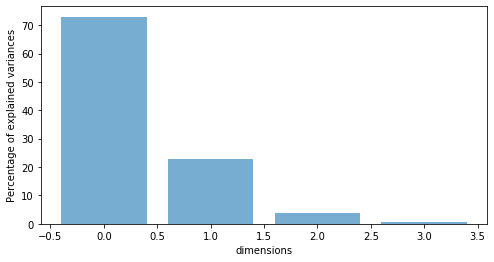

In [13]:
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances,alpha=0.6)
plt.ylabel('Percentage of explained variances')
plt.xlabel('dimensions')

In [ ]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1,columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()


In [ ]:
sns.FacetGrid(res,hue="Y",height=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()